In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [26]:
# Load the dataset
data = pd.read_csv('TESLA.csv')
close_prices = data['Close'].values.reshape(-1, 1)



In [38]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Define sequence length (number of time steps to look back)
sequence_length = 10

In [39]:
# Function to create sequences and labels
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append((seq, label))
    return np.array([item[0] for item in sequences]), np.array([item[1] for item in sequences])


In [40]:
# Create sequences and labels
X, y = create_sequences(scaled_close_prices, sequence_length)

# Define split ratio
split_ratio = 0.8

# Calculate train size
train_size = int(split_ratio * len(X))

# Split the data into training and testing sets
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [41]:
# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], sequence_length, 1))
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Generate predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual prices for plotting
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
4/4 [==============================] - 2s 9ms/step - loss: 0.2336
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1064
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0289
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0449
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0199
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0255
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0240
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0199
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 11/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0209
Epoch 12/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 13/50
4/4 [==============================] - 0s 7ms/step - loss:

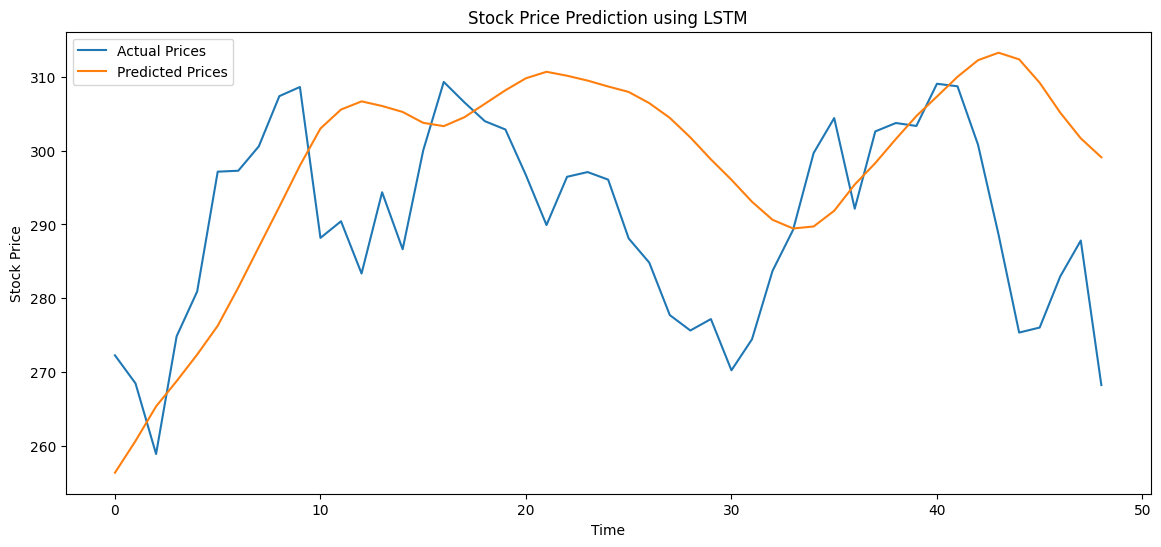

In [43]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [44]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Print the loss (MSE)
print('Mean Squared Error (MSE):', loss)

Mean Squared Error (MSE): 0.006747506093233824
